<img src="https://allvectorlogo.com/img/2017/07/ford-gobike-logo.png" alt="Wrangling" width="500px" >
</ui>
<table style="width:100%">
  <tr>
    <th><img src="https://2zwmzkbocl625qdrf2qqqfok-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/16056245_web1_1800704-sfe-gobike-002-1.jpg" alt="Wrangling"  width="400px" align="left"> </th>
    <th><img src="https://th.bing.com/th/id/OIF.8wmlMXkmK0K9dwPiIJ46Og?pid=ImgDet&rs=1" alt="Wrangling"  width="400px" align="left"></th>
 <th><img src="https://th.bing.com/th/id/R.48cab916ce7b18227133076486071d2b?rik=6aifiHAtn%2fxTJw&pid=ImgRaw&r=0" alt="Wrangling"  width="400px" align="left"></th>
     </tr>
  <tr>
    <td><h1>Ford gobike Data set Analysis  </h1></td>
       <td><img src="https://cdn.dribbble.com/users/37530/screenshots/1901054/hailo_dashboard.jpg" alt="Wrangling"  width="400px" align="left"></td>
    <td><a href="http://www.linkedin.com/in/mr-sha3ban "> <h6>By: Mohammad Shaaban</h6> </td>
  </tr>


In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {border: 1px  LightSteelBlue solid !important;
  color: DarkBlue
 !important;}


<div class="alert alert-block alert-success">
<b>Note:</b> Run the previous cell  to make the dataframes in this page more readable and formated .
</div>

### What is the structure of This dataset?



**This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.**

**This data set before doing any cleaning is (16 coluns x 183412 rows)**

<a href="https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv "> <h6>Download the data from here</h6> 

## The main features of interest in this dataset?



**Advertising campaign intersts  :**
> **1. members age.**
> **2. members gender.**
> **3. duration od trips**
> **4. user type**


## Features in the dataset I think will help support my investigation into my features of interest?

<a href="#A"><h3> Find out  What is most users ages which using these bikes?</h3>
<a href="#B"><h3>  What is most users gender which using these bikes?</h3>
<a href="#C"><h3> What is the most popular station ?</h3>
<a href="#D"><h3> What is the gender of the members spend more time (duration) using our bikes?</h3>
<a href="#E"><h3> Which gender of members subscribe more than the others ?</h3>
<a href="#F"><h3> Does the long  trip durations depending on the age of member?</h3>
<a href="#G"><h3> which costumers gender that mostly prefer spending more time using Ford bikes "spend more than 2 hours"?</h3>

# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤




# 

# 🙞 🗦  My main goal is to find a way to inform the Ford gobike marketing department of important insights to help them increase their subscribers. 🗧!
 
> **They told me that the framework of their advertising campaign Will  depend on my answers about the questions above**



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import ipywidgets as wg


# Reading the data set 
df=pd.read_csv('201902-fordgobike-tripdata.csv')

%matplotlib inline


# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤




# 

<a id='wrangling'></a>

<table style="width:100%" align="left">
  <tr>
    <th>
<img src="https://cdn.dribbble.com/users/43718/screenshots/1137873/loadinganimation1.gif" width="500px" align="left"> </th>
<th> <h1>Data Wrangling section.</h1></th>




In [3]:
# Here I can use the slider below to have a general look at the data rows and how it looks like
temp_df=pd.DataFrame()
def show_data(row=0):
    temp_df=df.loc[row:row+4]
    return temp_df
wg.interact(show_data,row=(0,df.index.max(),5));

interactive(children=(IntSlider(value=0, description='row', max=183411, step=5), Output()), _dom_classes=('wid…

# 🙞 🗦  Here I found that start and  end time type is not DateTime it's object  🗧!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# 🙞 🗦  Here I found some nulls and check this nulls in the data frame 🗧!


In [5]:
#check for columns that contain nulls
nlls=pd.DataFrame(df.isnull().sum(), columns=['Number_nulls'])
nlls=nlls[nlls['Number_nulls']!=0]
nlls

Number_nulls
start_station_id             197
start_station_name           197
end_station_id               197
end_station_name             197
member_birth_year           8265
member_gender               8265

## 🙞 🗦  Here I found that the  nulls repeated in the previus table are  in the same rows 🗧!

- The 197  of nulls  rows are the same
- The 8265  of nulls  rows are the same

In [6]:
#show the null raws by choosing the column that contain nulls
def show_null(column='start_station_id'):
    return df[df[column].isna()==True]
wg.interact(show_null,column=list(nlls.index));

interactive(children=(Dropdown(description='column', options=('start_station_id', 'start_station_name', 'end_s…

# 🙞 🗦 Here I found that there is no duplicates 🗧 !  



In [7]:
#here I will check for duplicated rows in the data set.
df.duplicated().sum()

0

# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤

<a id='Cleaning'></a>
<table style="width:100%" align="left">
  <tr>
    <th>
<img src="https://uploads-ssl.webflow.com/5ebeb41e0cdac7c04b3c373a/5f0a0574adf578b75483ab77_Animation_OfficeCleaning-para-web.gif" width="500px" align="left"> </th>
<th> <h1>Data Cleaning section.</h1></th>



# 🙞 🗦 Here I will change the Types of some columns to  fitting types  🗧 !  



In [8]:
# change the type of start date to DTime and creat 3 columns for the hour and day of the week and month from the start date col
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime) 
# change the data type for bike_share_for_all_trip to be boolean data type
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

# Changing the user_type, member_gender, and bike_share_for_all_trip to category format

df[['user_type', 'member_gender','bike_share_for_all_trip']]=df[['user_type', 'member_gender','bike_share_for_all_trip']].astype('category')


## 🙞 🗦 Here I will create some columns to be used in the analysis and drop some other 🗧!  

In [9]:
#create column with the year of start time to use it in calculate the age
df['year_start']=df['start_time'].dt.year

#creating column with the weekday of the start
df['week_day']=df['start_time'].dt.strftime('%a')


#using  year_start to creat a column with the age of members
df['member_age']=df['year_start']-df['member_birth_year']

# create column with the duriation hours

# df['duration']=(df['end_time']-df['start_time']).astype('timedelta64[h]')


df['duration_hours']=df.duration_sec/(60*60)

In [10]:
# here i will drop the 197 nulls rows and will keep the others to be dropped in the next cell
df = df.dropna(how='all',subset=['start_station_id'],axis=0) 

In [11]:
df.dropna(how='all',subset=['member_birth_year','member_gender'], axis=0, inplace=True)

In [12]:
# Just make sure that everything is ok
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  year_start week_day  member_age  \
0          Male                   False        2019      Thu        35.0   
2          Male                   False        2019      Thu        47.0   
3         Other                   False        2019      Thu        30.0   
4          Male                    True        2019      Thu        45.0   
5          Male                   False        2019      Thu        60.0   

   duration_hours  
0       14.495833  
2       17.181667  
3       10.136111  
4        0.440278  
5        0.498056

In [13]:
#Checking if every thing is ok
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

# ------------------So our data is clean now !

---------

# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤




# 

<a id='Cleaning'></a>
<table style="width:100%" align="left">
  <tr>
    <th>
<img src="https://institute.careerguide.com/wp-content/uploads/2020/10/7a2fc27b966a50792117d375a24bb71e.gif" width="500px" align="left"> </th>
<th> <h1>Exploratory section.</h1></th>



## 🙞 🗦 Here I will see the correlation between variables using a heatmap  🗧 !  

''

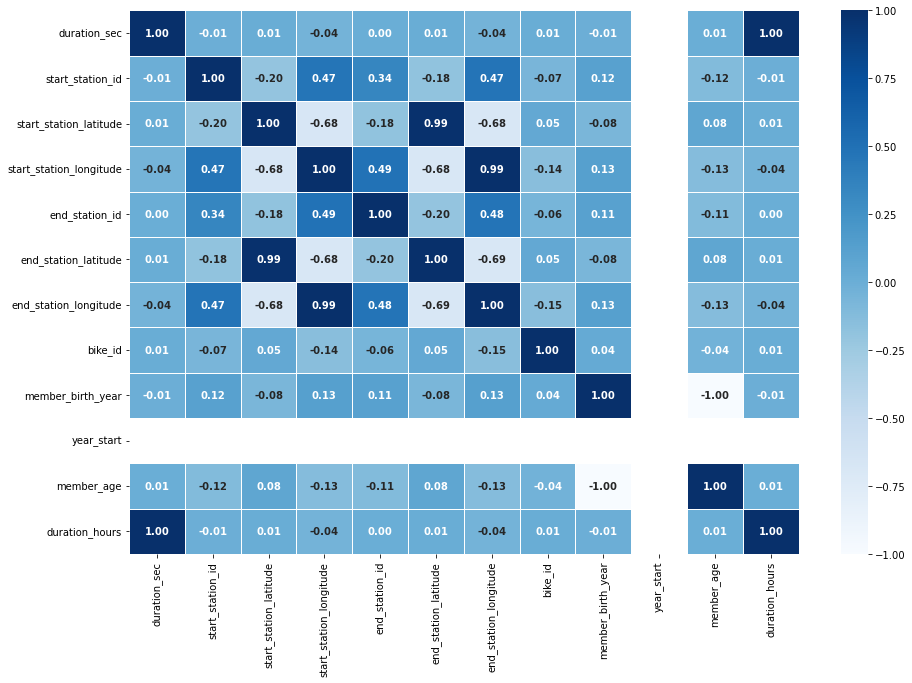

In [14]:
# this will be a general look

plt.figure(figsize=[15,10])
sb.heatmap(df.corr(),cmap='Blues',annot=True,annot_kws={'fontweight':'bold'},fmt='.2f',linewidths=1,center=0)
;

## 🙞 🗦 Here I will see the counts of each variable   🗧 !  

In [15]:
# I will use the following function to explore the count of values in pivot_values as a column in the dataset
# depending on the  pivot_index column unique values
# this step allows me to see what can i do with the variables i have from the same cell

def show_pivot(pivot_index='member_age',pivot_values='start_time'):
    if pivot_index!=pivot_values:
        temp_df=pd.pivot_table(df, values=pivot_values, index=pivot_index, aggfunc='count')
    else:
        print('Error:  You must choose different column in pivot_values ')
        
    print('The pivot table below  has {} columns  and {} rows. '.format(temp_df.shape[1],temp_df.shape[0]))
    
    
    
    return temp_df

wg.interact(show_pivot,pivot_index=list(df.columns),pivot_values=list(df.columns));


interactive(children=(Dropdown(description='pivot_index', index=18, options=('duration_sec', 'start_time', 'en…

<a id='A'></a>
## 🙞 🗦  Answering What is most users ages which using these bikes 🗧 !

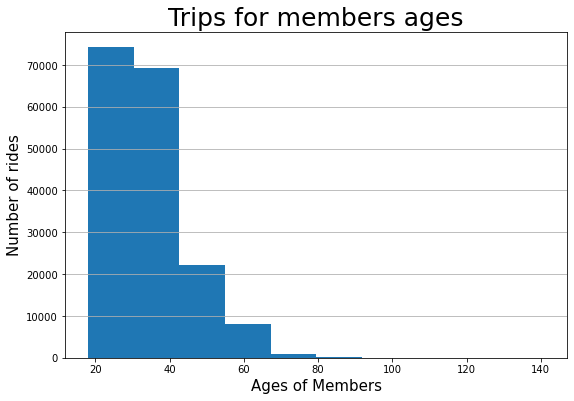

In [16]:
#explore the spread of the number of starting a trip regarding members ages  
plt.figure(figsize=[9,6])
plt.hist(df.member_age)

plt.xlabel('Ages of Members',{'fontsize': 15})
plt.ylabel('Number of rides',{'fontsize': 15})
plt.grid( axis='y')
plt.title(' Trips for members ages ', {'fontsize': 25} )
plt.show();


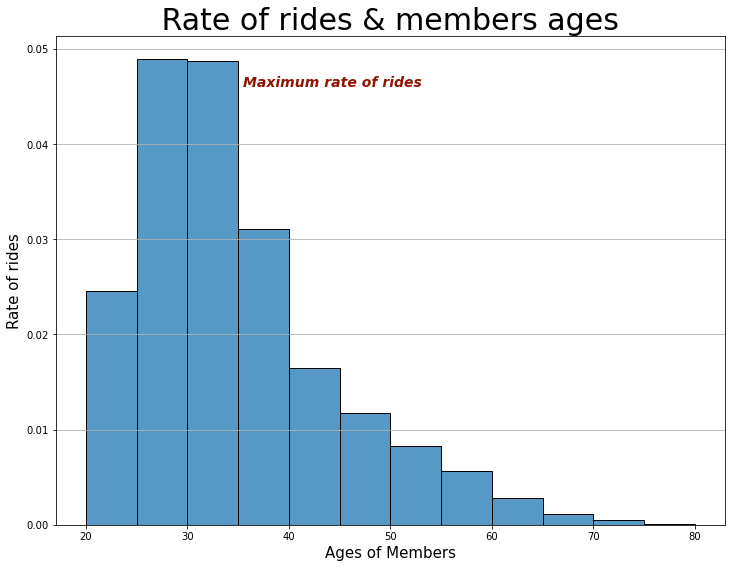

In [17]:
# it will be better reducing the range of looking to see the distribution clearly and make it density to see it as percentages
plt.figure(figsize=[12,9])
sb.histplot(df.member_age,bins=[20,25,30,35,40,45,50,55,60,65,70,75,80],stat='density')
plt.grid( axis='y')

plt.xlabel('Ages of Members',{'fontsize': 15})
plt.ylabel('Rate of rides',{'fontsize': 15})

plt.text(35.5, 0.046, "Maximum rate of rides",
         color='xkcd:brick red',
         fontsize=14,
         fontweight='bold',
         fontstyle='italic'
        )
plt.title(' Rate of rides & members ages ', {'fontsize': 30} )
plt.savefig('Rate of rides & members ages.png',bbox_inches='tight')
plt.show();


# -----------------------------  So our most common age is between 25 & 35

<a id='B'></a>
## 🙞 🗦 Here I will explore if  the gender and age affect the number of trips ?  🗧 !  

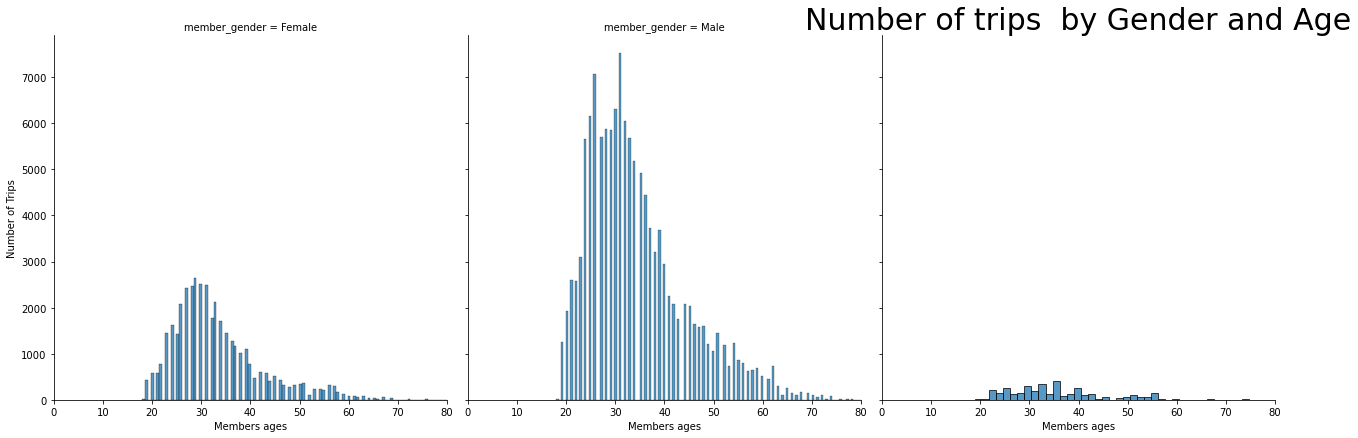

In [18]:

sb.FacetGrid(df,col='member_gender',xlim=(0,80), height=6
            ).map(sb.histplot,'member_age'
                 ).set_axis_labels('Members ages','Number of Trips');

plt.title('Number of trips  by Gender and Age', {'fontsize': 30} )

plt.savefig('facet.png',bbox_inches='tight')
plt.show()

# --------------- Seems that between  the age of 25-35 is the most usage of our bikes specially when the user type is male.

# 

<a id='C'></a>
# 🙞 🗦 Let's explore   the most  popular stations  🗧 !  

In [19]:
#here I will explore the Usage volume and rate of each station and get its location data
stations_df=pd.pivot_table(df, values=['start_time'], index='start_station_name', aggfunc=['count'])
stations_df=stations_df.join(pd.pivot_table(df, values=['start_station_latitude','start_station_longitude'],
                                            index='start_station_name', aggfunc=['max']))


stations_df.columns=['count_start','start_station_latitude','start_station_longitude']

# here i will add percentage for this usage to my pivot table result
stations_df['percent']=(stations_df.count_start/stations_df.count_start.sum())


stations_df.sort_values(by='count_start', ascending=False,inplace=True)
stations_df

count_start  \
start_station_name                                                
Market St at 10th St                                       3649   
San Francisco Caltrain Station 2  (Townsend St ...         3408   
Berry St at 4th St                                         2952   
Montgomery St BART Station (Market St at 2nd St)           2711   
Powell St BART Station (Market St at 4th St)               2620   
...                                                         ...   
Willow St at Vine St                                          9   
Parker Ave at McAllister St                                   7   
21st Ave at International Blvd                                4   
Palm St at Willow St                                          3   
16th St Depot                                                 2   

                                                    start_station_latitude  \
start_station_name                                                           
Market St at 10th St                                             37.776619   
San Francisco Caltrain Station 2  (Townsend St ...               37.776639   
Berry St at 4th St                                               37.775880   
Montgomery St BART Station (Market St at 2nd St)                 37.789625   
Powell St BART Station (Market St at 4th St)                     37.786375   
...                                                                    ...   
Willow St at Vine St                                             37.318450   
Parker Ave at McAllister St                                      37.776101   
21st Ave at International Blvd                                   37.784855   
Palm St at Willow St                                             37.317298   
16th St Depot                                                    37.766349   

                                                    start_station_longitude  \
start_station_name                                                            
Market St at 10th St                                            -122.417385   
San Francisco Caltrain Station 2  (Townsend St ...              -122.395526   
Berry St at 4th St                                              -122.393170   
Montgomery St BART Station (Market St at 2nd St)                -122.400811   
Powell St BART Station (Market St at 4th St)                    -122.404904   
...                                                                     ...   
Willow St at Vine St                                            -121.883172   
Parker Ave at McAllister St                                     -122.453093   
21st Ave at International Blvd                                  -122.239305   
Palm St at Willow St                                            -121.884995   
16th St Depot                                                   -122.396292   

                                                     percent  
start_station_name                                            
Market St at 10th St                                0.020857  
San Francisco Caltrain Station 2  (Townsend St ...  0.019480  
Berry St at 4th St                                  0.016873  
Montgomery St BART Station (Market St at 2nd St)    0.015496  
Powell St BART Station (Market St at 4th St)        0.014976  
...                                                      ...  
Willow St at Vine St                                0.000051  
Parker Ave at McAllister St                         0.000040  
21st Ave at International Blvd                      0.000023  
Palm St at Willow St                                0.000017  
16th St Depot                                       0.000011  

[329 rows x 4 columns]

In [20]:
# here I will find the most popular station
stations_df[stations_df.count_start==stations_df.count_start.max()]

count_start  start_station_latitude  \
start_station_name                                          
Market St at 10th St         3649               37.776619   

                      start_station_longitude   percent  
start_station_name                                       
Market St at 10th St              -122.417385  0.020857

## 🙞 🗦 Here I will explore  all the stations on the map and mark  the most  popular station  🗧 !  
-  **I will use the popularity of the station as   the radius  of each station circle .**

-  **You can put the mouse pointer over the station to know Its ratio and click if you wanna know its name in the dataset .**

In [21]:
# here I will show the most popular stations on the map with the frequency rate of each station

import folium
my_map = folium.Map([37.7802, -122.4095],zoom_start=15)

# the following loop will plot a cercle on 
# the loctions of stations and the radius will depend on the popularity of the station

for n in stations_df.index :
    current_location=(stations_df.loc[n]['start_station_latitude'],stations_df.loc[n]['start_station_longitude'])
    
    folium.Circle(
        location=current_location,
        popup=n,
        radius=10000*stations_df.loc[n]['percent'],
        fill=True,
        opacity=0.8,
        fill_opacity=.6,
        tooltip=(str(format(stations_df.loc[n]['percent'],'.2%')))
        
    ).add_to(my_map)


    
 #here I will identify the most popular satation with a location marker sign
    
Max_location=(stations_df.loc['Market St at 10th St']['start_station_latitude'],
              stations_df.loc['Market St at 10th St']['start_station_longitude'])  

    
folium.Marker(location=Max_location, 
                    
              popup=(str(format(stations_df.loc['Market St at 10th St']['percent'],'.2%'))),
              tooltip='Most popular station' 
             
             ).add_to(my_map)    

my_map



# you can zoom in and out to see the stations and the percentage of using it by mouse over the pointer above the circles
#you can also click on any circle (station) to see its name


## 🙞 🗦 Here I will explore   the most  popular stations in a bar chart  🗧 !  

In [22]:
#gitting the most  7 popular stations in a bar chart with
max_station=stations_df[stations_df.percent>=stations_df.percent.mean()]

for i in range(3):
    max_station=max_station[max_station.percent>=max_station.percent.mean()]
    

fig=px.bar(data_frame=max_station,
       x=max_station.index.values,
       y=max_station.percent.values,
         
       labels={'x':'Stations','y': 'Total users count'},
       title=" Most popular stations",template='simple_white',
          width=900,height=800
          )
fig.update_yaxes(showgrid=True)
fig.add_annotation(text='Most popular station',x='Market St at 10th St',y=0.021,arrowhead=1,arrowsize=2,showarrow=True)

fig.show()


# --------------  Most popular station is (Market St at 10th St)

<a id='D'></a>
# 🙞 🗦  Here I will answer the question of What is the gender of members spend more time (duration) using our bikes  🗧 !

In [23]:
#here I will explore the total_duration_hours  rate of each gender 
gender_duration=pd.pivot_table(df, values=['duration_hours'], index='member_gender', aggfunc=['count','sum'])

gender_duration.columns=['gender_count','total_duration_hours']

gender_duration['duration_percent']=(gender_duration.total_duration_hours/gender_duration.total_duration_hours.sum())

gender_duration.sort_values(by='duration_percent', ascending=False,inplace=True)


gender_duration


gender_count  total_duration_hours  duration_percent
member_gender                                                      
Male                 130500          24374.313333          0.712429
Female                40805           8828.306389          0.258040
Other                  3647           1010.349167          0.029531

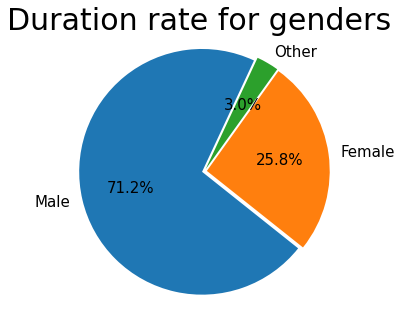

In [24]:
plt.figure(figsize=[5,5])
labels = gender_duration.index
pie = gender_duration['duration_percent']
plt.pie(pie, labels=labels, autopct='%1.1f%%', startangle=65,explode=(0.02,0.02, 0.02),
        textprops = {'color': '0','fontsize':15},
        wedgeprops = {'linewidth': 1},
     
        center = (0.1,0.1))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Duration rate for genders ', {'fontsize': 30} )

plt.show()

# -----------  First look we would say that  males more likely to spend more time using our bikes !



#  but we must consider the imbalance in the data set
 > I will calculate duration hours  for each person in any gender  as "member duration"  column and then plot the propation 

In [25]:
# first calculate how many each person spending time by gender
gender_duration['member_duration']=(gender_duration.total_duration_hours/gender_duration.gender_count)
gender_duration['prop']=(gender_duration.member_duration/gender_duration.member_duration.sum())
gender_duration

gender_count  total_duration_hours  duration_percent  \
member_gender                                                         
Male                 130500          24374.313333          0.712429   
Female                40805           8828.306389          0.258040   
Other                  3647           1010.349167          0.029531   

               member_duration      prop  
member_gender                             
Male                  0.186776  0.274604  
Female                0.216354  0.318090  
Other                 0.277036  0.407306

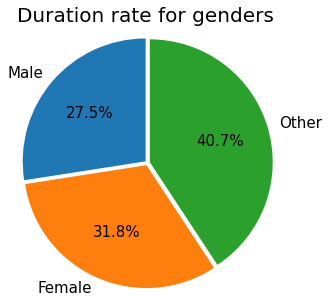

In [26]:
plt.figure(figsize=[5,5])
labels = gender_duration.index
pie = gender_duration['prop']
plt.pie(pie, labels=labels, autopct='%1.1f%%', startangle=90,explode=(0.02,0.02, 0.02),
        textprops = {'color': '0','fontsize':15},
        wedgeprops = {'linewidth': 1},
     
        center = (0.1,0.1))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Duration rate for genders ', {'fontsize': 20} )
plt.savefig('pie.png',bbox_inches='tight')
plt.show()

# -------- Surprisely gender(Other) more likely to spend more time using Ford Go bikes !


# 

<a id='E'></a>
## 🙞 🗦 Here I will explore which gender of members subscribe more than the others 🗧 !

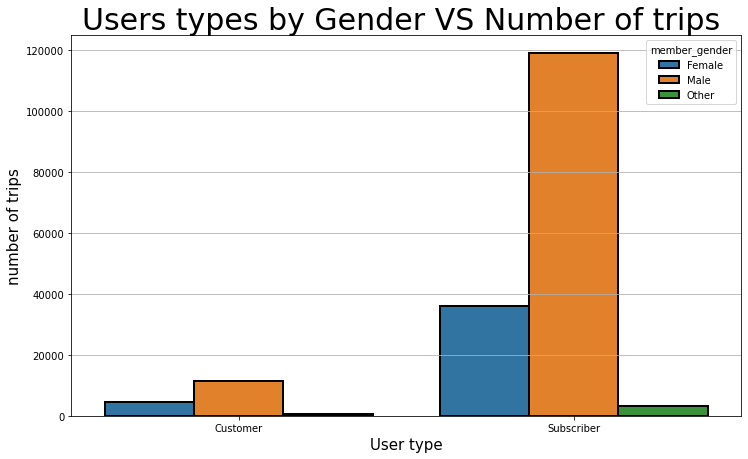

In [27]:
plt.figure(figsize=[12,7])
sb.countplot(x='user_type', hue='member_gender',lw=2,ec='Black', data=df)
plt.grid(axis='y')
plt.title('Users types by Gender VS Number of trips ', {'fontsize': 30} )
plt.xlabel('User type',{'fontsize': 15})
plt.ylabel('number of trips',{'fontsize': 15})
plt.savefig('Users types by Gender VS Number of trips.png',bbox_inches='tight')
plt.show();

# ------------------So males are more subscribing than other genders
#  But we must be aware of  Simpson's paradox and imbalance in the dataset
#   So let's Normalize !

#  


In [28]:
Customer_genders=df[df['user_type']=='Customer'].member_gender
Subscriber_genders=df[df['user_type']=='Subscriber'].member_gender

In [29]:
Customer_prop=Customer_genders.value_counts(normalize=True)
Subscriber_prop=Subscriber_genders.value_counts(normalize=True)

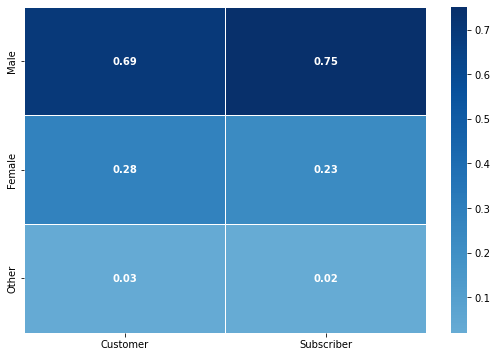

In [30]:
#generate the dataframe and plot it with heatmap
User_type_gender=pd.DataFrame([Customer_prop,Subscriber_prop]).T
User_type_gender.columns=['Customer','Subscriber']
plt.figure(figsize=[9,6])
sb.heatmap(User_type_gender,cmap='Blues',annot=True,annot_kws={'fontweight':'bold'},fmt='.2f',linewidths=1,center=0);
plt.show();


# --------------So we can depend on the First  chart and say in some confidance levele that (Males) more likely to be subscriber

# 


<a id='F'></a>
## 🙞 🗦 Here I will explore if long  trip durations depending on the age of member 🗧 !


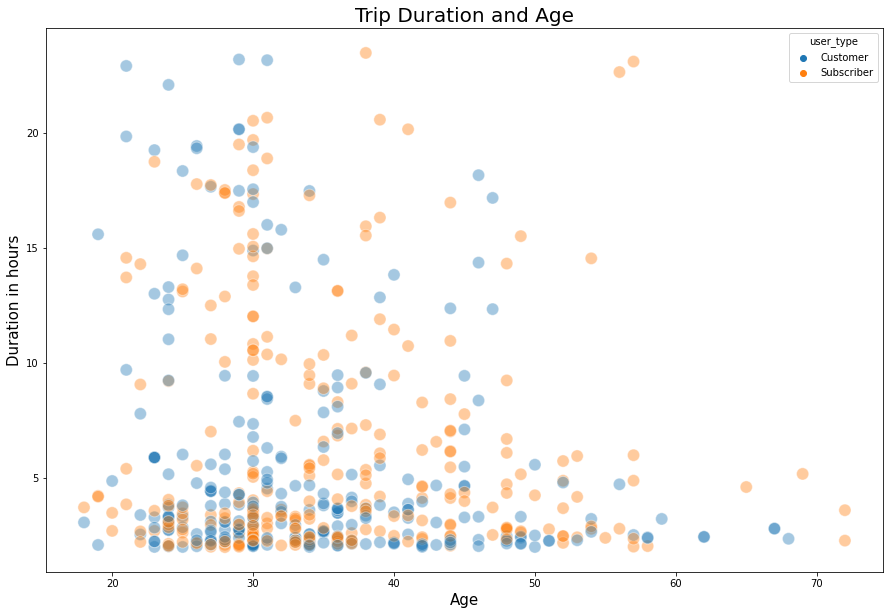

In [31]:
# here i will see the correlation between age and duration in hours by showing the user type as hue
plt.figure(figsize=[15,10])
sb.scatterplot( x='member_age',
               y='duration_hours',
               alpha = 0.4,
               marker = 'o',
               s=150,
               hue='user_type',
             
               data=df[ df[ 'duration_hours'] >=2.0 ])


plt.title('Trip Duration and Age', {'fontsize': 20})
plt.xlabel('Age',{'fontsize': 15})
plt.ylabel('Duration in hours',{'fontsize': 15})
plt.savefig('Trip Duration and Age.png',bbox_inches='tight')
plt.show()


# ------ as we can see the long trip durations depends on the age of member.
#     

<a id='G'></a>
### 🙞 🗦 Let's see which costumers gender   that mostly prefer spending more time using Ford bikes "spend more than 2 hours" 🗧 !

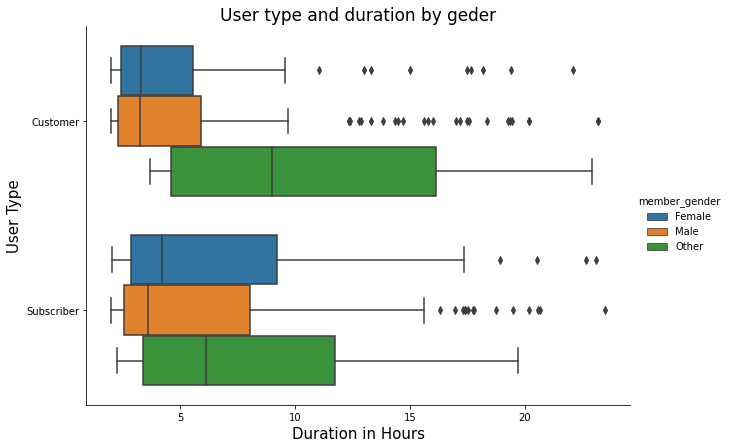

In [32]:

sb.catplot(y='user_type',x='duration_hours',kind='box',hue='member_gender',data=df[ df[ 'duration_hours'] >=2 ],
           height=6, aspect=1.5)
plt.title('User type and duration by geder', {'fontsize': 17})
plt.xlabel('Duration in Hours',{'fontsize': 15})
plt.ylabel('User Type', {'fontsize': 15})
plt.savefig('User type and duration by geder.png',bbox_inches='tight')
plt.show();



# ------------ The most gender prefer spending time using For bikes is (Other) in both cases (Subscribers and Customers).

----

# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤




# 

<a id='Cleaning'></a>
<table style="width:100%" align="left">
  <tr>
    <th>
<img src="https://www.sendiancreations.com/ar/wp-content/uploads/2019/05/opening.gif" width="500px" align="left"> </th>
<th> <h1>Conclusions section.</h1></th>


      
   



<div class="alert alert-danger">
  <strong>Note!</strong>  First we must consider the time we gathered this data on and its representation of the population of data we can collect.
</div>

# Conclusions >> We can say in some confidence level that :

> ### 1. Maximum trips  rate are by users ages between 25 & 35 years old.
> ### 2. Males in age between 25-35 is the most usage of Ford bikes .
> ### 3. Most popular station is (Market St at 10th St) .
> ### 4. Gender(Other) more likely to spend more time using Ford Go bikes.
> ### 5. Males are more subscribing than other genders.
> ### 6. The most gender prefer spending time using For bikes is (Other) in both cases (Subscribers and Customers).
> ### 7. Long trip durations depends on the age of member.

# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤







# 

<img src="https://th.bing.com/th/id/OIP.nGj6TdFdVpR89OM-fri1lAHaCd?pid=ImgDet&rs=1" alt="Wrangling" width="500px" align="center">